## Evaluate Model

Code and visualizations to test, debug, and evaluate the Mask R-CNN model.

Based on: https://github.com/matterport/Mask_RCNN/blob/master/samples/coco/inspect_model.ipynb

In [1]:
import os
import sys
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "models")

# Local path to trained weights file
MODEL_TRANSFERLEARNING_5 = os.path.join(MODEL_DIR, "mask_rcnn_coco_ads_transfer_learning_5.h5")
MODEL_TRANSFERLEARNING_40 = os.path.join(MODEL_DIR, "mask_rcnn_coco_ads_transfer_learning_13.h5")
MODEL_TRANSFERLEARNING_01 = os.path.join(MODEL_DIR, "mask_rcnn_coco_ads_transfer_learning_13_001.h5")
MODEL_MRCNN_5 = os.path.join(MODEL_DIR, "mask_rcnn_ads_cfg_1.h5")

Using TensorFlow backend.


## Configurations

In [2]:

from src.dataset.ads_dataset import AdvertisementDataset, AdsConfig

class PredictionConfig(AdsConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    USE_MINI_MASK = False


DATA_DIR = "../data"

In [3]:
config = PredictionConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                16
IMAGE_MIN_DIM                  400
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE             

## Notebook Preferences

In [4]:
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0
TEST_MODE = "inference"

In [5]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

## Load Validation Dataset

In [6]:
dataset = AdvertisementDataset()
dataset.load_dataset(DATA_DIR, is_train=False)
dataset.prepare()

# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

Images: 25
Classes: ['BG', 'billboard', 'signage', 'branding']


## Mask RCNN - Model Evaluation

In [7]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

# Load weights
print("Loading weights ", MODEL_MRCNN_5)
model.load_weights(MODEL_MRCNN_5, by_name=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


Instructions for updating:
Use `tf.cast` instead.


Loading weights  /home/julio/studies/penn-state/ad-block-real-world/models/mask_rcnn_ads_cfg_1.h5



## Run Detection

image ID: dataset.DrearySuburbanGlobefish (3) ../data/images/DrearySuburbanGlobefish.jpg
Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 16)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32

*** No instances to display *** 

gt_class_id              shape: (1,)                  min:    2.00000  max:    2.00000  int32
gt_bbox                  shape: (1, 4)                min:  152.00000  max:  294.00000  int32
gt_mask                  shape: (384, 640, 1)         min:    0.00000  max:    2.00000  uint8


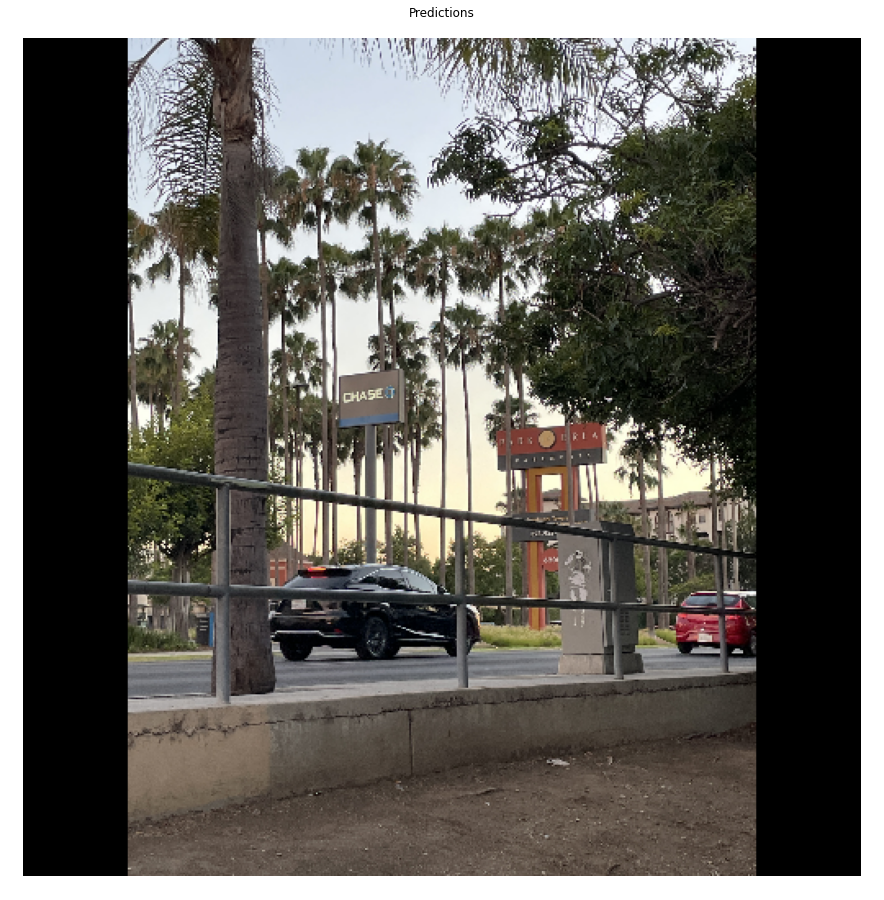

In [8]:
image_id = 3
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))
# Run object detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

image ID: dataset.EquatorialSaneArmedcrab (23) ../data/images/EquatorialSaneArmedcrab.jpg
Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 16)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32

*** No instances to display *** 

gt_class_id              shape: (3,)                  min:    2.00000  max:    2.00000  int32
gt_bbox                  shape: (3, 4)                min:  117.00000  max:  467.00000  int32
gt_mask                  shape: (512, 512, 3)         min:    0.00000  max:    2.00000  uint8


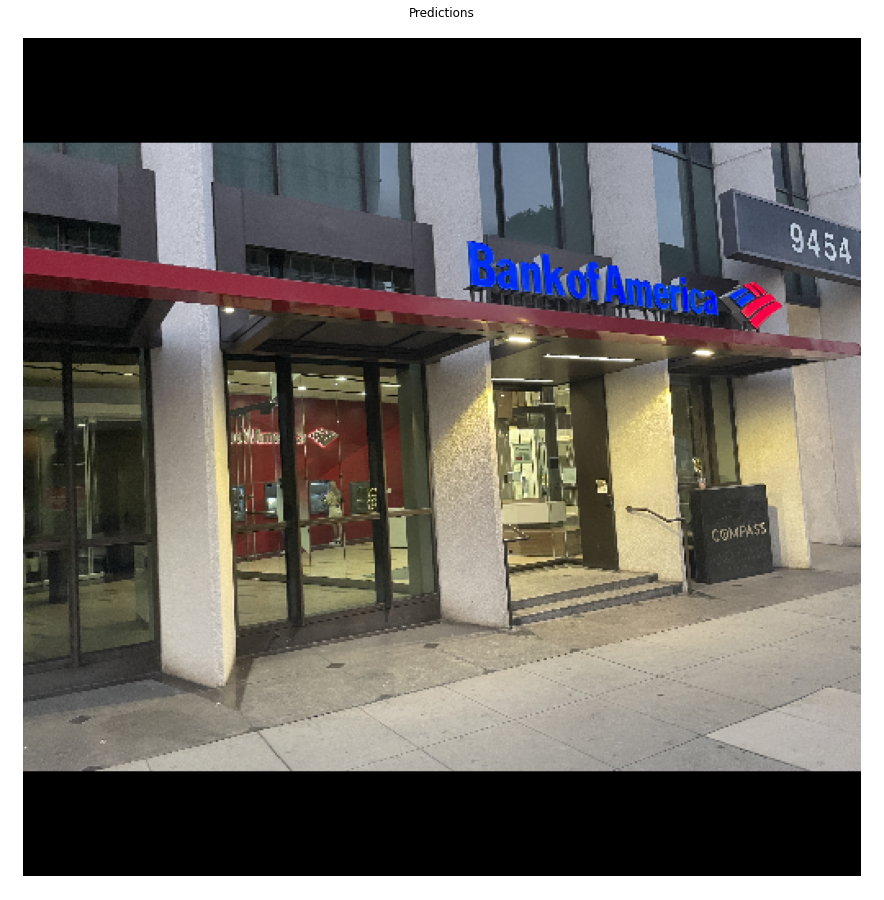

In [9]:
image_id = 23
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))
# Run object detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

### Compute mAP @ IoU=50 on Batch of Images

In [10]:
# Compute VOC-style Average Precision
def compute_batch_ap(image_ids):
    APs = []
    for image_id in image_ids:
        # Load image
        image, image_meta, gt_class_id, gt_bbox, gt_mask =\
            modellib.load_image_gt(dataset, config,
                                   image_id, use_mini_mask=False)
        # Run object detection
        results = model.detect([image], verbose=0)
        # Compute AP
        r = results[0]
        try:
            AP, precisions, recalls, overlaps =\
            utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                              r['rois'], r['class_ids'], r['scores'], r['masks'])
            APs.append(AP)
            info = dataset.image_info[image_id]
            meta = modellib.parse_image_meta(image_meta[np.newaxis,...])
            print("{:3} {}   AP: {:.2f}".format(
            meta["image_id"][0], meta["original_image_shape"][0], AP))
        except ValueError:
            print(f"image: {image_id}, no annotations detected")
    return APs

# Pick a set of random images
image_ids = np.random.choice(dataset.image_ids, 10)
APs = compute_batch_ap(image_ids)
print("mAP @ IoU=50: ", np.mean(APs))

image: 8, no annotations detected
image: 20, no annotations detected
  0 [3024 4032    3]   AP: 0.00
 19 [3024 4032    3]   AP: 0.00
image: 13, no annotations detected
image: 20, no annotations detected
 23 [3024 4032    3]   AP: 0.00
  6 [4032 3024    3]   AP: 0.00
image: 17, no annotations detected
image: 8, no annotations detected
mAP @ IoU=50:  0.0


## Transfer Learning - Model Evaluation

In [11]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

# Load weights
print("Loading weights ", MODEL_TRANSFERLEARNING_5)
model.load_weights(MODEL_TRANSFERLEARNING_5, by_name=True)

Loading weights  /home/julio/studies/penn-state/ad-block-real-world/models/mask_rcnn_coco_ads_transfer_learning_5.h5


## Run Detection

image ID: dataset.DrearySuburbanGlobefish (3) ../data/images/DrearySuburbanGlobefish.jpg
Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 16)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32
gt_class_id              shape: (1,)                  min:    2.00000  max:    2.00000  int32
gt_bbox                  shape: (1, 4)                min:  152.00000  max:  294.00000  int32
gt_mask                  shape: (384, 640, 1)         min:    0.00000  max:    2.00000  uint8


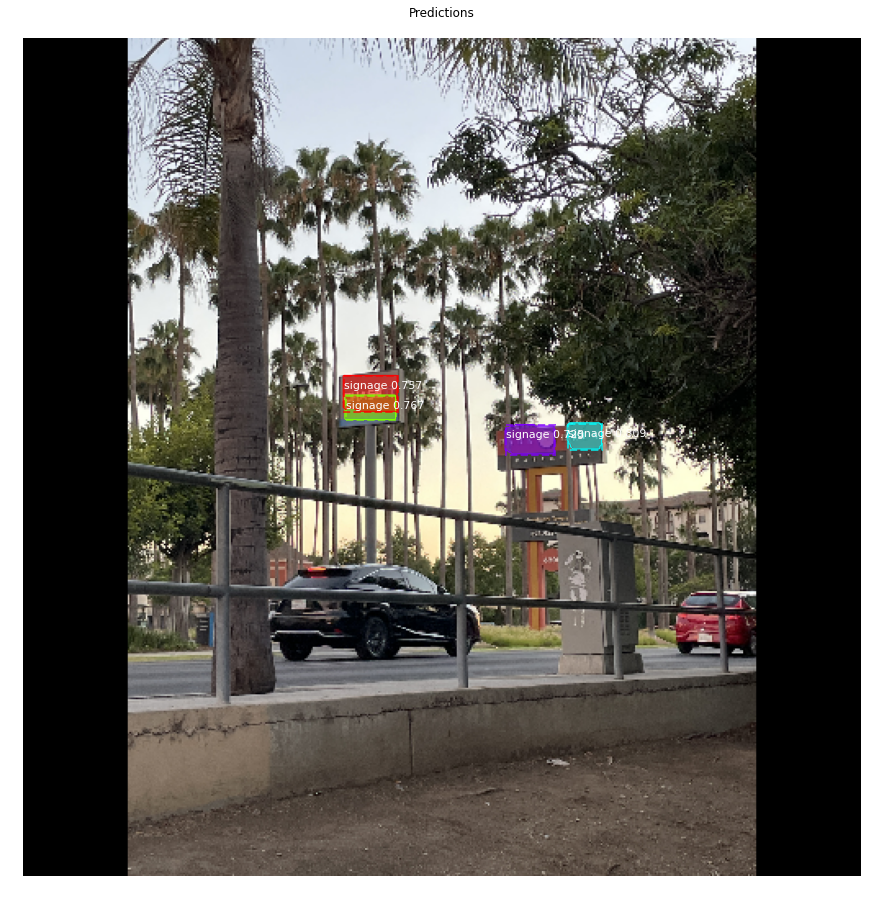

In [12]:
image_id = 3
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))
# Run object detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

image ID: dataset.EquatorialSaneArmedcrab (23) ../data/images/EquatorialSaneArmedcrab.jpg
Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 16)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32
gt_class_id              shape: (3,)                  min:    2.00000  max:    2.00000  int32
gt_bbox                  shape: (3, 4)                min:  117.00000  max:  467.00000  int32
gt_mask                  shape: (512, 512, 3)         min:    0.00000  max:    2.00000  uint8


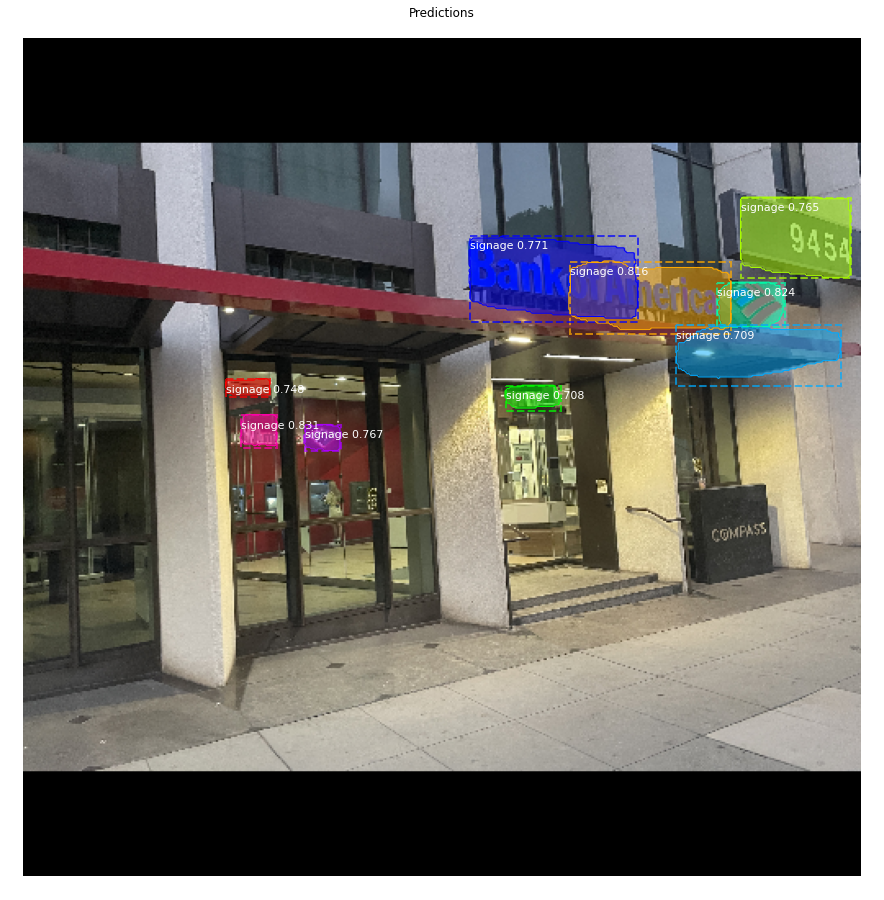

In [13]:
image_id = 23
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))
# Run object detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

### Compute mAP @ IoU=50 on Batch of Images

In [14]:
image_ids = np.random.choice(dataset.image_ids, 10)
APs = compute_batch_ap(image_ids)
print("mAP @ IoU=50: ", np.mean(APs))

image: 3, no annotations detected
image: 15, no annotations detected
  1 [4032 3024    3]   AP: 0.00
image: 15, no annotations detected
  5 [3024 4032    3]   AP: 0.00
 16 [3024 4032    3]   AP: 0.00
 19 [3024 4032    3]   AP: 0.00
image: 18, no annotations detected
 22 [4032 3024    3]   AP: 0.00
image: 3, no annotations detected
mAP @ IoU=50:  0.0


## Transfer Learning 40 epochs - Model Evaluation

In [15]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

# Load weights
print("Loading weights ", MODEL_TRANSFERLEARNING_40)
model.load_weights(MODEL_TRANSFERLEARNING_40, by_name=True)

Loading weights  /home/julio/studies/penn-state/ad-block-real-world/models/mask_rcnn_coco_ads_transfer_learning_13.h5


## Run Detection

image ID: dataset.DrearySuburbanGlobefish (3) ../data/images/DrearySuburbanGlobefish.jpg
Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 16)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32
gt_class_id              shape: (1,)                  min:    2.00000  max:    2.00000  int32
gt_bbox                  shape: (1, 4)                min:  152.00000  max:  294.00000  int32
gt_mask                  shape: (384, 640, 1)         min:    0.00000  max:    2.00000  uint8


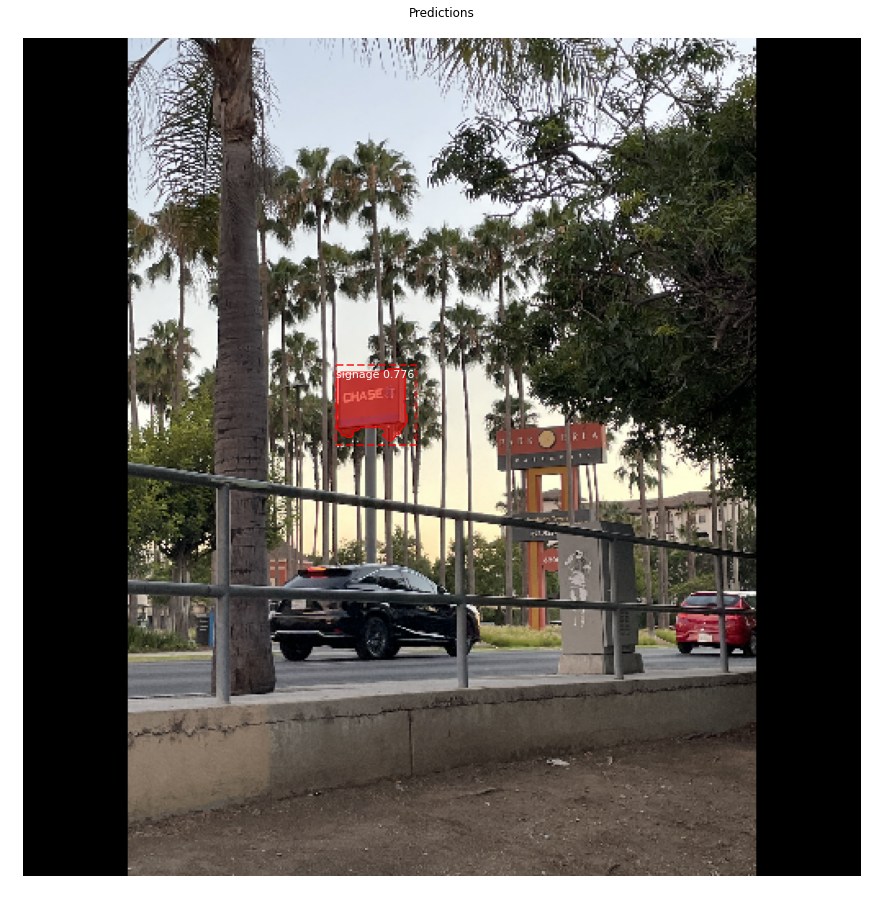

In [16]:
image_id = 3
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))
# Run object detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

image ID: dataset.EquatorialSaneArmedcrab (23) ../data/images/EquatorialSaneArmedcrab.jpg
Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 16)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32
gt_class_id              shape: (3,)                  min:    2.00000  max:    2.00000  int32
gt_bbox                  shape: (3, 4)                min:  117.00000  max:  467.00000  int32
gt_mask                  shape: (512, 512, 3)         min:    0.00000  max:    2.00000  uint8


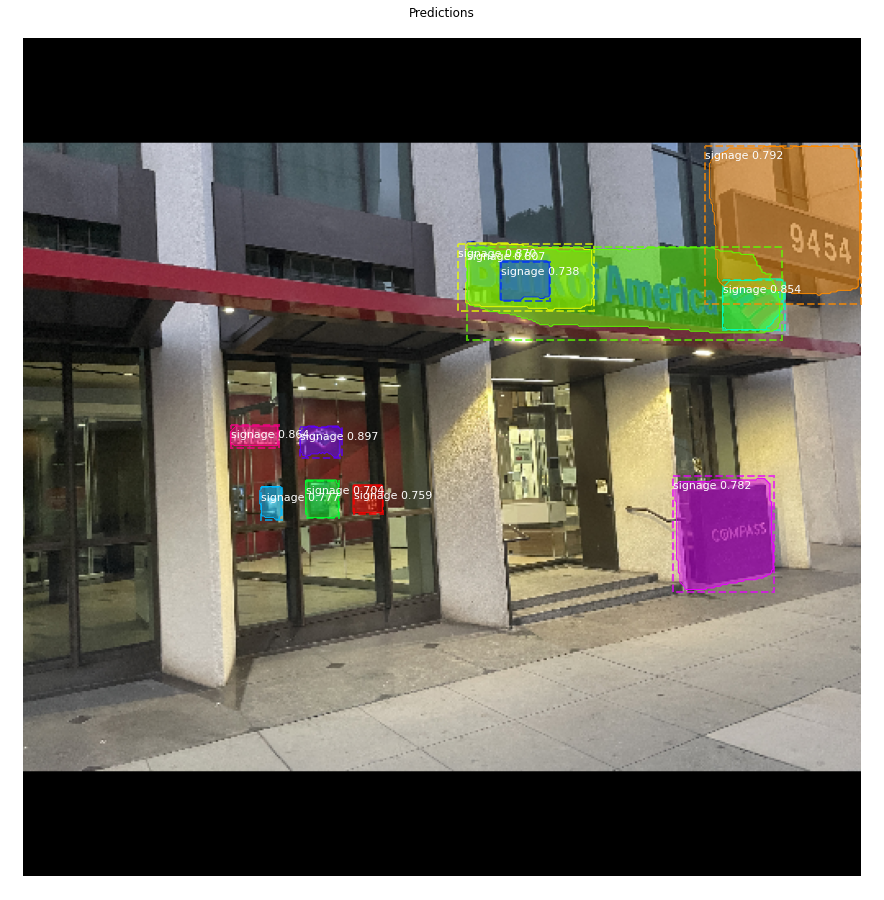

In [17]:
image_id = 23
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))
# Run object detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

### Compute mAP @ IoU=50 on Batch of Images

In [18]:
# Pick a set of random images
image_ids = np.random.choice(dataset.image_ids, 10)
APs = compute_batch_ap(image_ids)
print("mAP @ IoU=50: ", np.mean(APs))

 20 [4032 3024    3]   AP: 0.00
 13 [4032 3024    3]   AP: 0.00
 14 [1816 4032    3]   AP: 0.27
image: 18, no annotations detected
image: 10, no annotations detected
image: 7, no annotations detected
  2 [3024 4032    3]   AP: 0.00
  4 [4032 3024    3]   AP: 0.00
 21 [3024 4032    3]   AP: 0.00
image: 12, no annotations detected
mAP @ IoU=50:  0.04444444510671827


## Transfer Learning 13 epochs - Model Evaluation - Higher Learning Rate

In [19]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

# Load weights
print("Loading weights ", MODEL_TRANSFERLEARNING_01)
model.load_weights(MODEL_TRANSFERLEARNING_40, by_name=True)

Loading weights  /home/julio/studies/penn-state/ad-block-real-world/models/mask_rcnn_coco_ads_transfer_learning_13_001.h5


## Run Detection

image ID: dataset.DrearySuburbanGlobefish (3) ../data/images/DrearySuburbanGlobefish.jpg
Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 16)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32
gt_class_id              shape: (1,)                  min:    2.00000  max:    2.00000  int32
gt_bbox                  shape: (1, 4)                min:  152.00000  max:  294.00000  int32
gt_mask                  shape: (384, 640, 1)         min:    0.00000  max:    2.00000  uint8


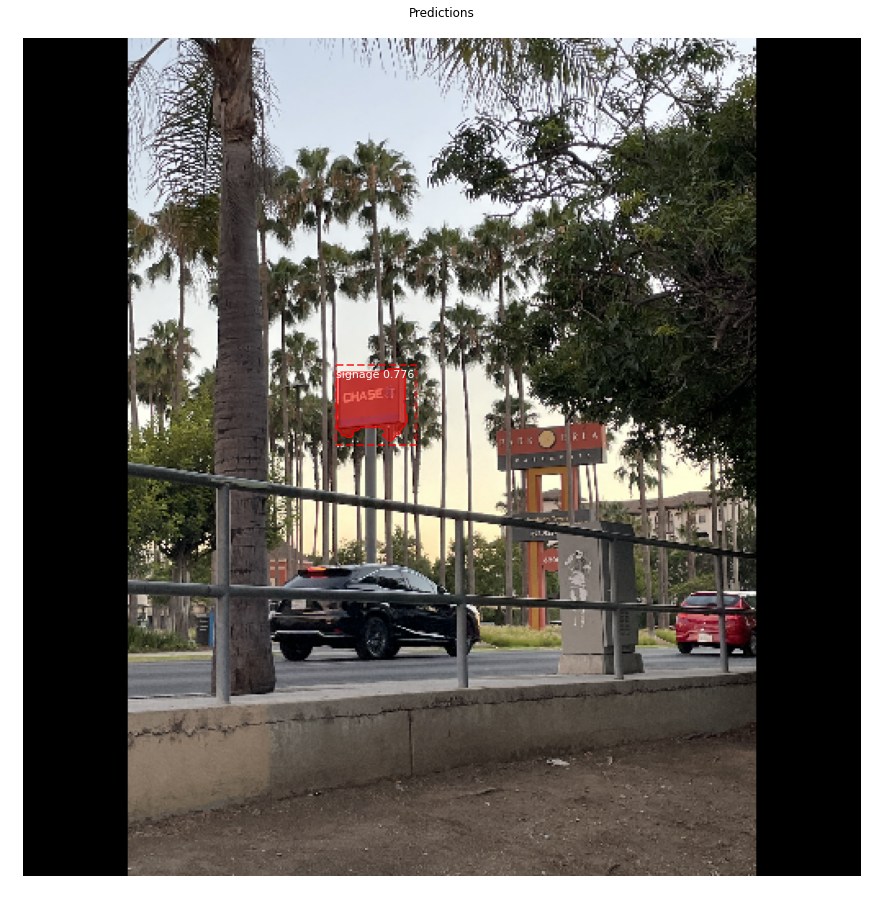

In [20]:
image_id = 3
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))
# Run object detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

image ID: dataset.EquatorialSaneArmedcrab (23) ../data/images/EquatorialSaneArmedcrab.jpg
Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 16)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32
gt_class_id              shape: (3,)                  min:    2.00000  max:    2.00000  int32
gt_bbox                  shape: (3, 4)                min:  117.00000  max:  467.00000  int32
gt_mask                  shape: (512, 512, 3)         min:    0.00000  max:    2.00000  uint8


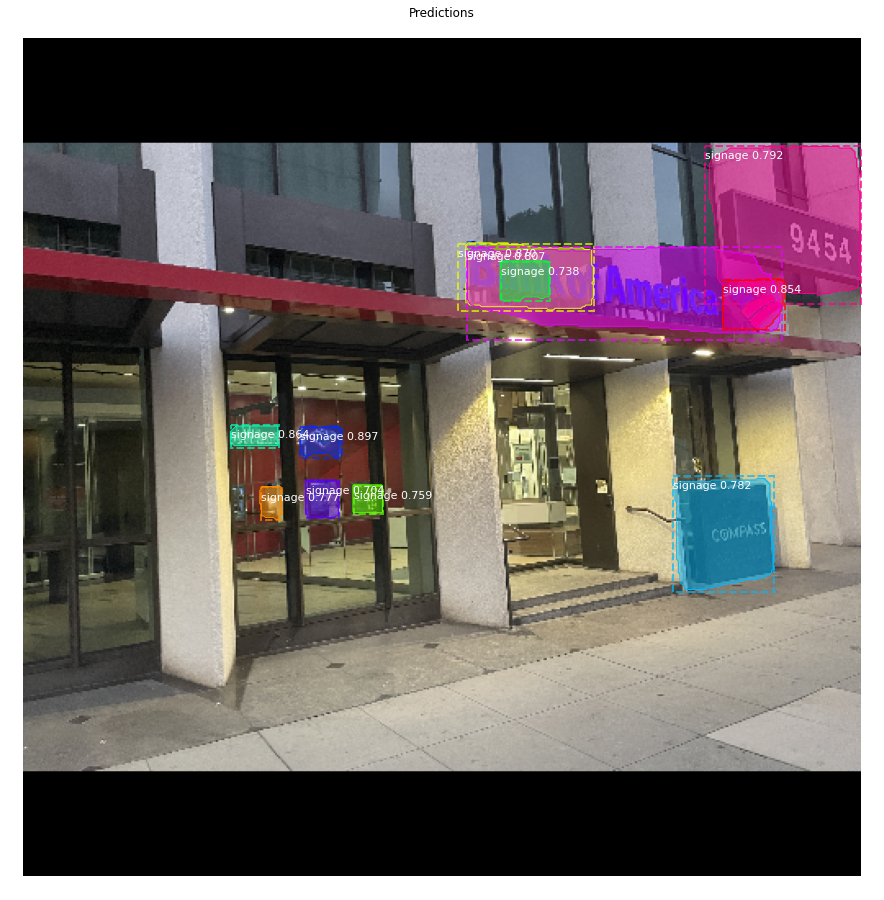

In [21]:
image_id = 23
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))
# Run object detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

### Compute mAP @ IoU=50 on Batch of Images

In [22]:
# Pick a set of random images
image_ids = np.random.choice(dataset.image_ids, 10)
APs = compute_batch_ap(image_ids)
print("mAP @ IoU=50: ", np.mean(APs))

image: 9, no annotations detected
 23 [3024 4032    3]   AP: 0.07
 23 [3024 4032    3]   AP: 0.07
image: 6, no annotations detected
  4 [4032 3024    3]   AP: 0.00
 22 [4032 3024    3]   AP: 0.00
 16 [3024 4032    3]   AP: 0.06
image: 1, no annotations detected
 11 [3024 4032    3]   AP: 0.00
image: 3, no annotations detected
mAP @ IoU=50:  0.032638889551162724


### Precision-Recall

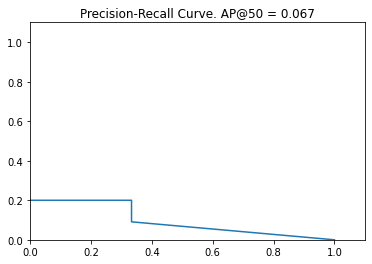

In [23]:
# Draw precision-recall curve
AP, precisions, recalls, overlaps = utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                                          r['rois'], r['class_ids'], r['scores'], r['masks'])
visualize.plot_precision_recall(AP, precisions, recalls)

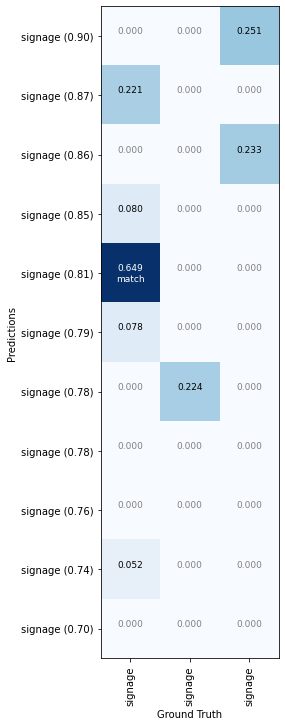

In [24]:
# Grid of ground truth objects and their predictions
visualize.plot_overlaps(gt_class_id, r['class_ids'], r['scores'],
                        overlaps, dataset.class_names)